In [45]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load the CSV data
file_path = 'RunningData.csv'  # Replace with your actual file path

try:
    # Read the file with the first row as column names
    print("Attempting to read the file with the first row as column names:")
    df = pd.read_csv(file_path, header=0)  # First row is used as header
    print("Preview of raw data:")
    print(df.head(10))  # Print the first 10 rows to check structure

except Exception as e:
    print(f"An error occurred while reading the file: {e}")

# Proceed only if the DataFrame is loaded successfully
if df is not None and not df.empty:
    # Step 3: Clean and process the DataFrame
    # Strip any leading/trailing whitespace from column names
    df.columns = df.columns.str.strip()

    # Check column names after cleaning
    print("Column names after stripping whitespace:", df.columns)

    # Define the cleaning function for time format
    def clean_time_format(time_str):
        if pd.isna(time_str):
            return time_str  # Return NaN as is
        parts = time_str.split(':')
        # If there are only two components (mm:ss), add "00:" in front
        if len(parts) == 2:
            return f"00:{time_str}"
        # If there are three components (hh:mm:ss), return as is
        return time_str

    # Apply the cleaning function to the 'Time' column
    if 'Time' in df.columns:
        df['Cleaned Time'] = df['Time'].apply(clean_time_format)
    else:
        print("Column 'Time' is missing. Skipping time-related processing.")

    # Create a new column for Total Seconds (handling the new logic for minutes/hours determination)
def calculate_total_seconds(time_str):
    if pd.isna(time_str):
        return None  # Return None for NaN

    parts = time_str.split(':')
    
    # Case 1: If the first part is greater than or equal to 4, we assume it's hh:mm:ss format
    if len(parts) == 3:
        first_part = int(parts[0])  # The first part (minutes or hours)
        
        # If the first part is greater than or equal to 4, treat it as hours:minutes:seconds
        if first_part <= 5:
            hours, minutes, seconds = map(int, parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
        else:
            # Otherwise, it's in mm:ss:SSS format (minutes:seconds:milliseconds)
            minutes, seconds, milliseconds = map(int, parts)
            total_seconds = minutes * 60 + seconds + milliseconds / 1000
        return total_seconds
    
    # If the format doesn't match, return None
    return None

# Apply the cleaning function to the 'Cleaned Time' column
if 'Cleaned Time' in df.columns:
    df['Total Seconds'] = df['Cleaned Time'].apply(calculate_total_seconds)

# Check the DataFrame with the new columns
if 'Total Seconds' in df.columns:
    print("Preview of updated DataFrame with new columns:")
    print(df[['Time', 'Cleaned Time', 'Total Seconds']])

    if 'Cleaned Time' in df.columns:
        df['Total Seconds'] = df['Cleaned Time'].apply(calculate_total_seconds)

    # Check the DataFrame with the new columns
    if 'Total Seconds' in df.columns:
        print("Preview of updated DataFrame with new columns:")
        print(df[['Time', 'Cleaned Time', 'Total Seconds']])

    # Reset index
    df.reset_index(drop=True, inplace=True)

    # Convert necessary columns to appropriate data types
    if 'Distance' in df.columns:
        df['Distance'] = df['Distance'].str.replace(' mi', '').astype(float)
    else:
        print("Column 'Distance' is missing. Skipping distance conversion.")

    if 'Heart Rate' in df.columns:
        df['Heart Rate'] = df['Heart Rate'].astype(int)
    else:
        print("Column 'Heart Rate' is missing. Skipping heart rate conversion.")

    # # Final DataFrame preview
    # print("Final processed DataFrame:")
    # print(df.head())

    # Step 4: Calculate pace in miles per hour
    def calculate_pace(df):
        """
        Calculates the pace in miles per hour (mph) for each row in the DataFrame.

        Args:
            df (pd.DataFrame): DataFrame containing running data with 'Total Seconds' and 'Distance' columns.

        Returns:
            pd.DataFrame: DataFrame with a new column 'Pace (mph)' representing the pace in miles per hour.
        """
        # Ensure that the required columns are available
        if 'Total Seconds' not in df.columns or 'Distance' not in df.columns:
            print("Missing necessary columns for pace calculation.")
            return df
        
        # Calculate pace in miles per hour: pace = distance (in miles) / time (in hours)
        # Convert Total Seconds to hours by dividing by 3600 (seconds in an hour)
        df['Pace (mph)'] = df['Distance'] / (df['Total Seconds'] / 3600)
        
        return df

    # Apply the pace calculation function to the DataFrame
    if df is not None:
        df = calculate_pace(df)

        # Check the DataFrame with the new 'Pace (mph)' column
        print("\nDataFrame with calculated pace:")
        print(df[['Distance', 'Total Seconds', 'Pace (mph)']].head())

else:
    print("Data loading failed or resulted in an empty DataFrame. Check the file content and delimiter.")

# Clean the Elevation column by removing the 'ft' suffix and converting to numeric values
df['Elevation'] = pd.to_numeric(df['Elevation'].str.replace(' ft', '', regex=False), errors='coerce')


Attempting to read the file with the first row as column names:
Preview of raw data:
  Sport             Date                  Title      Time Distance  Elevation  \
0   Run  Tue, 12/17/2024          Detached pt 2  57:20:00   7.25 mi    127 ft   
1   Run  Mon, 12/16/2024               Detached   1:16:09  10.00 mi    236 ft   
2   Run  Sun, 12/15/2024                   Sore  47:15:00   4.34 mi     92 ft   
3   Run  Sat, 12/14/2024  808’s and Heartbreaks   1:25:21  10.50 mi    261 ft   
4   Run  Thu, 12/12/2024               Recovery   1:19:40   8.00 mi    286 ft   
5   Run  Wed, 12/11/2024                Sun Run   1:04:44   8.10 mi    215 ft   
6   Run  Tue, 12/10/2024   Warm Up for PL Final   1:11:46   8.10 mi    310 ft   
7   Run   Mon, 12/9/2024                  Tired  57:23:00   7.00 mi    124 ft   
8   Run   Sun, 12/8/2024         No Recognition   1:05:48   7.12 mi    127 ft   
9   Run   Sat, 12/7/2024                   Peak   1:42:38  13.13 mi    289 ft   

   Heart Rate  Pace   


In [46]:
# Step 5: Calculate pace in miles per hour

def calculate_pace(df):
    """
    Calculates the pace in miles per hour (mph) for each row in the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing running data with 'Total Seconds' and 'Distance' columns.

    Returns:
        pd.DataFrame: DataFrame with a new column 'Pace (mph)' representing the pace in miles per hour.
    """
    # Ensure that the required columns are available
    if 'Total Seconds' not in df.columns or 'Distance' not in df.columns:
        print("Missing necessary columns for pace calculation.")
        return df
    
    # Calculate pace in miles per hour: pace = distance (in miles) / time (in hours)
    # Convert Total Seconds to hours by dividing by 3600 (seconds in an hour)
    df['Pace (mph)'] = df['Distance'] / (df['Total Seconds'] / 3600)
    
    return df

# Apply the pace calculation function to the DataFrame
if df is not None:
    df = calculate_pace(df)

    # Check the DataFrame with the new 'Pace (mph)' column
    print("\nDataFrame with calculated pace:")
    print(df[['Distance', 'Total Seconds', 'Pace (mph)']].head())




DataFrame with calculated pace:
   Distance  Total Seconds  Pace (mph)
0      7.25         3440.0    7.587209
1     10.00         4569.0    7.879186
2      4.34         2835.0    5.511111
3     10.50         5121.0    7.381371
4      8.00         4780.0    6.025105


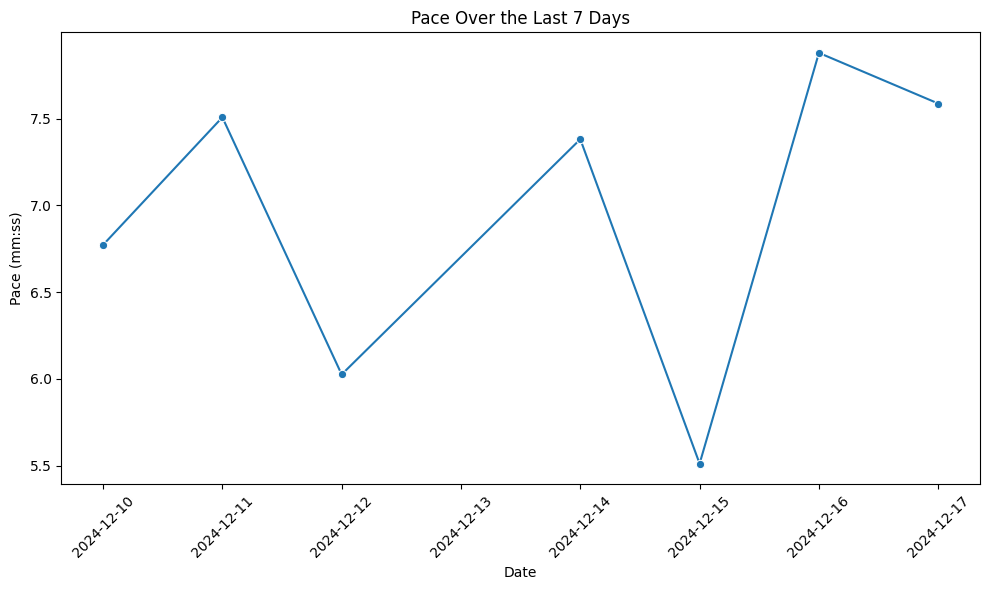

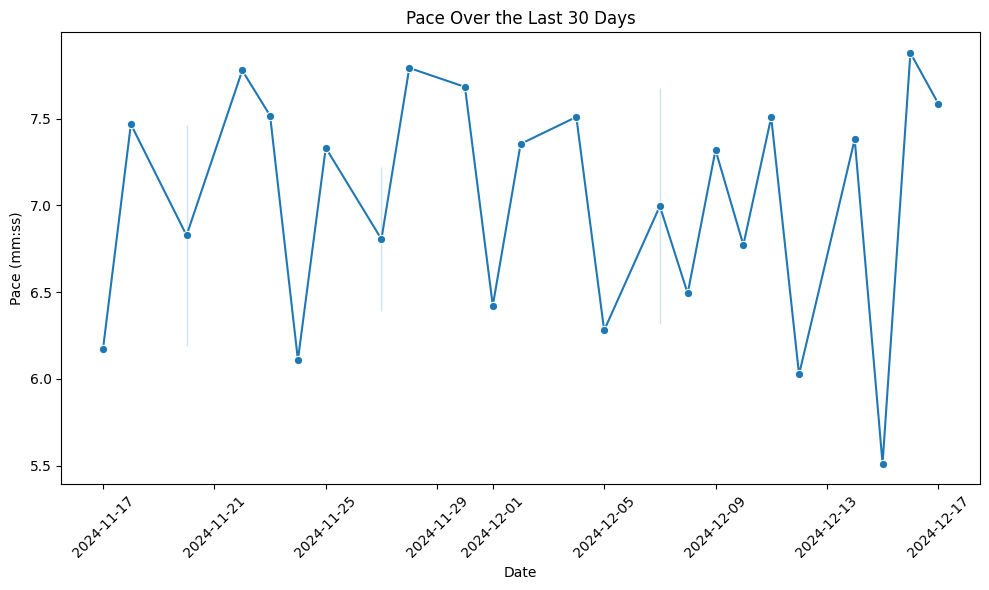

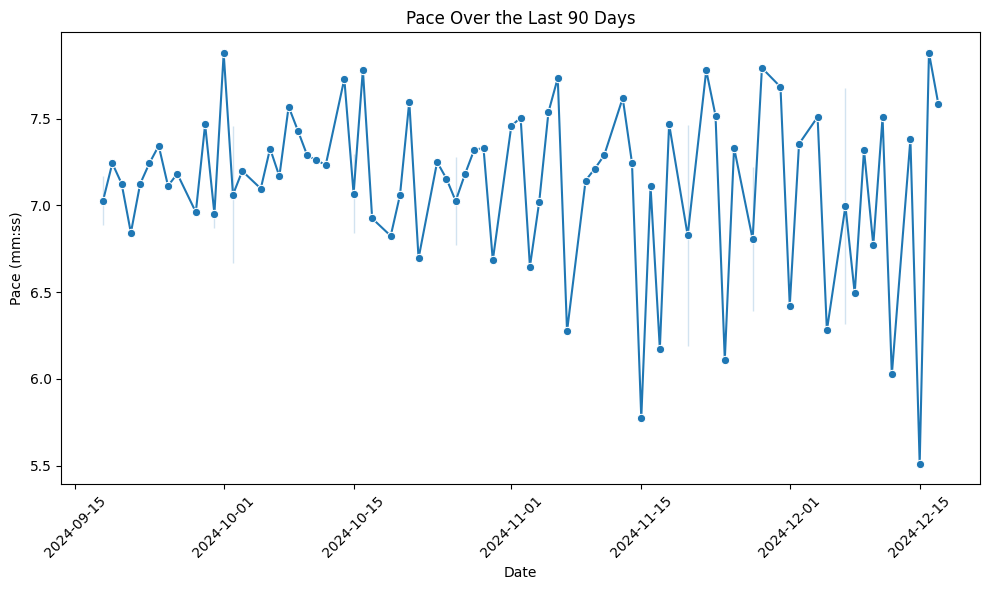

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure 'Date' is in datetime format and sort the DataFrame by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Get the most recent date in the DataFrame
most_recent_date = df['Date'].max()

# Function to filter data for the last X days
def filter_last_days(df, days):
    return df[df['Date'] >= most_recent_date - pd.Timedelta(days=days)]

# 1. Pace Over the Last 7 Days
last_7_days = filter_last_days(df, 7)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Pace (mph)', data=last_7_days, marker='o')
plt.title('Pace Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Pace (mm:ss)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pace Over the Last 30 Days
last_30_days = filter_last_days(df, 30)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Pace (mph)', data=last_30_days, marker='o')
plt.title('Pace Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Pace (mm:ss)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Pace Over the Last 90 Days
last_90_days = filter_last_days(df, 90)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Pace (mph)', data=last_90_days, marker='o')
plt.title('Pace Over the Last 90 Days')
plt.xlabel('Date')
plt.ylabel('Pace (mm:ss)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter entries with Pace (mph) below 5
# pace_below_5_mph = last_90_days[last_90_days['Pace (mph)'] < 5]

# # Print these entries
# print("Entries with a pace below 5 mph over the last 90 days:")
# print(pace_below_5_mph)


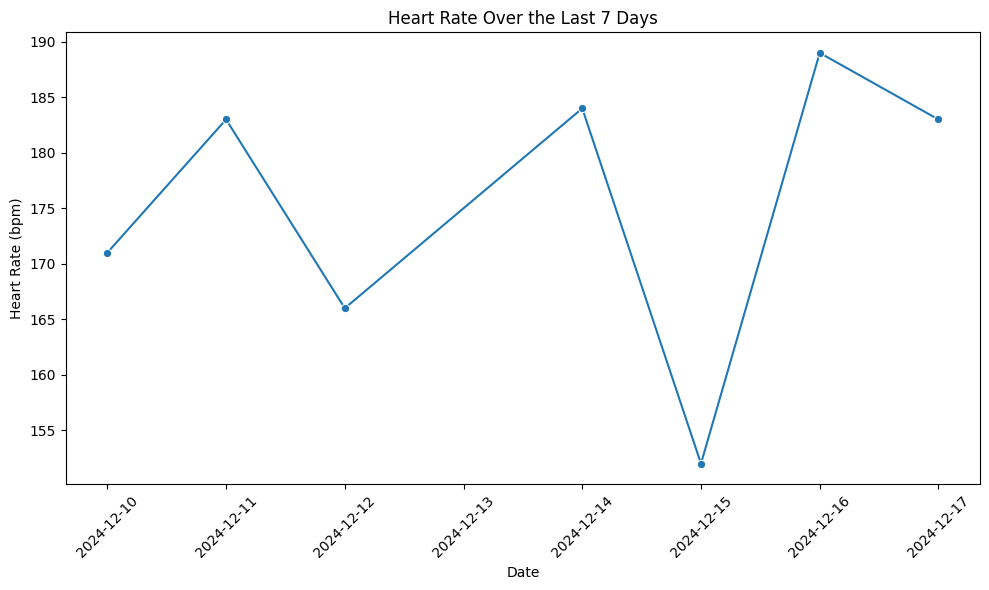

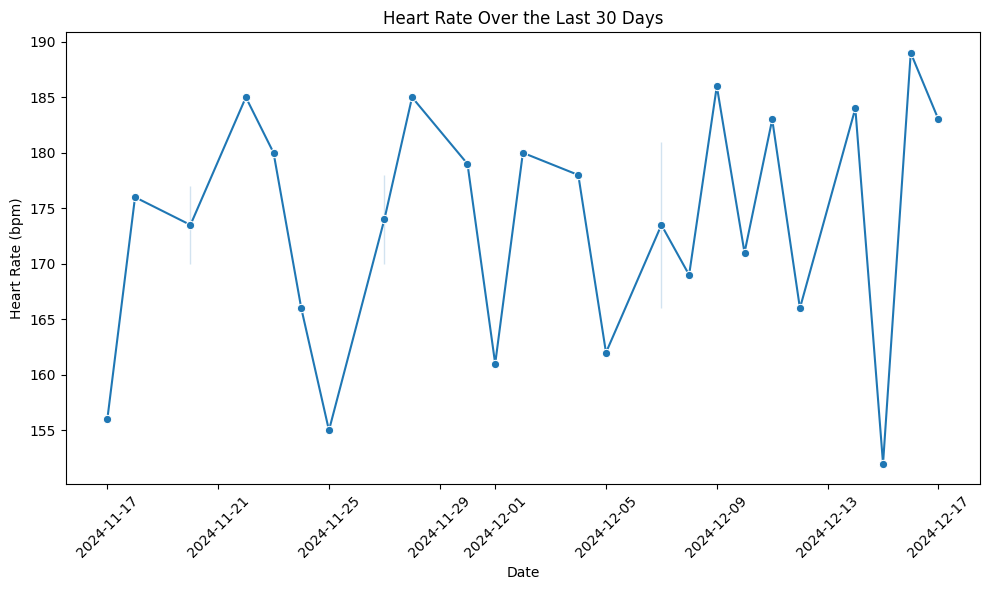

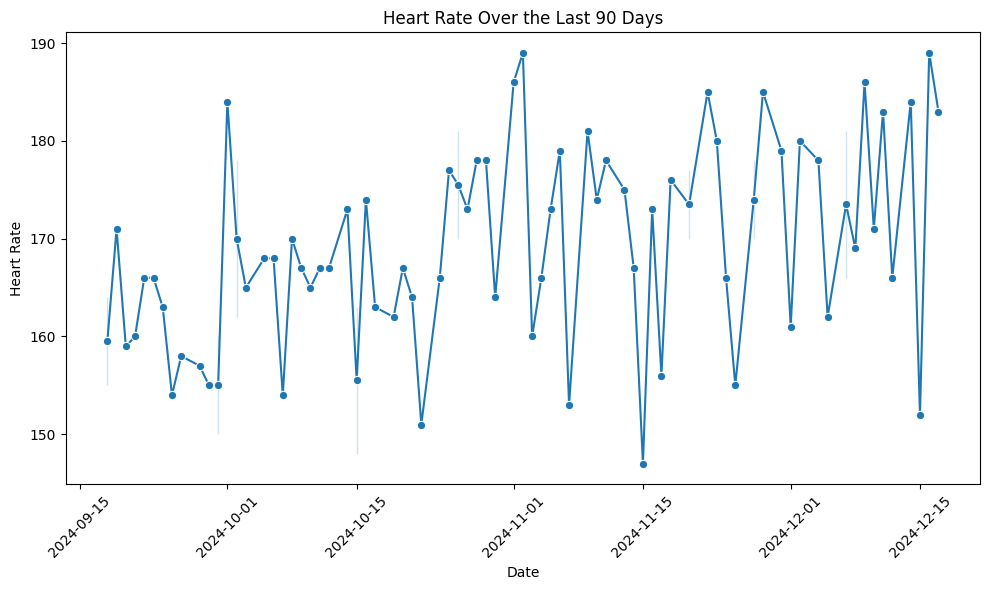

In [48]:
# 1. Heart Rate Over the Last 7 Days
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Heart Rate', data=last_7_days, marker='o')
plt.title('Heart Rate Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heart Rate Over the Last 30 Days
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Heart Rate', data=last_30_days, marker='o')
plt.title('Heart Rate Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Heart Rate (bpm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Heart Rate', data=last_90_days, marker='o')
plt.title('Heart Rate Over the Last 90 Days')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

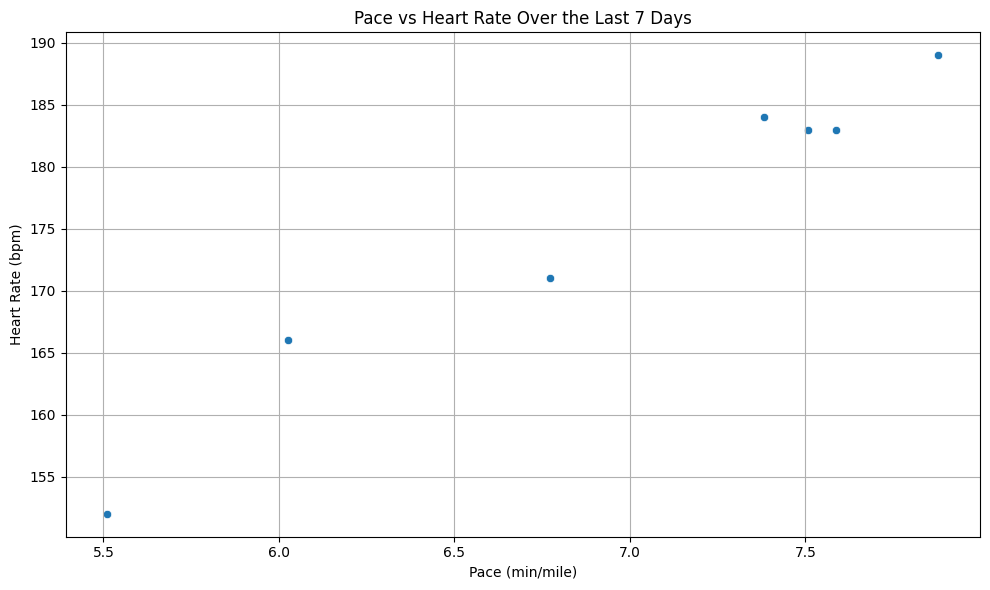

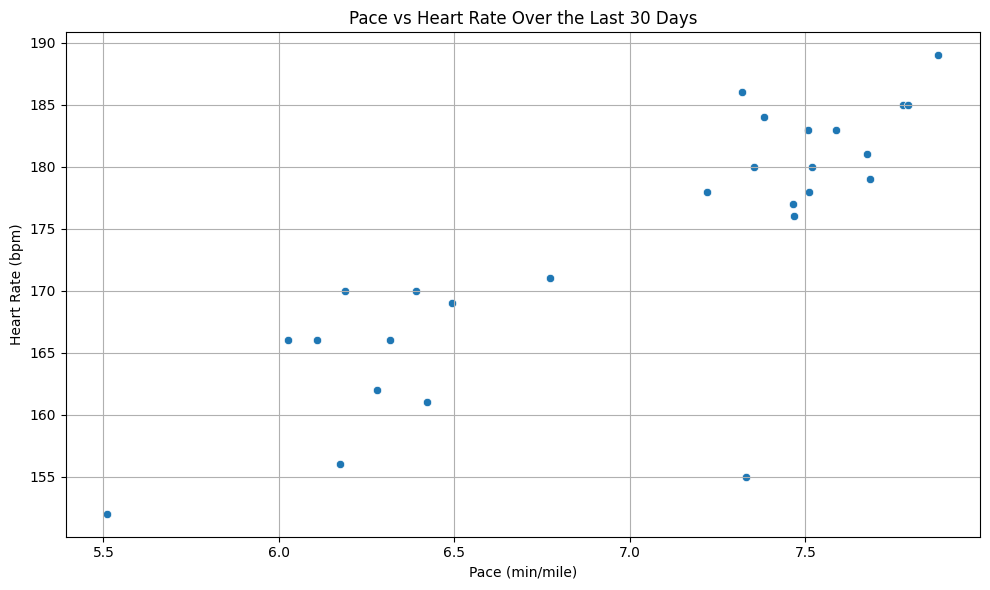

In [49]:
import matplotlib.pyplot as plt

# Scatter Plot: Pace vs Heart Rate for the Last 7 Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pace (mph)', y='Heart Rate', data=last_7_days)
plt.title('Pace vs Heart Rate Over the Last 7 Days')
plt.xlabel('Pace (min/mile)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Pace vs Heart Rate for the Last 30 Days
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pace (mph)', y='Heart Rate', data=last_30_days)
plt.title('Pace vs Heart Rate Over the Last 30 Days')
plt.xlabel('Pace (min/mile)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show() 


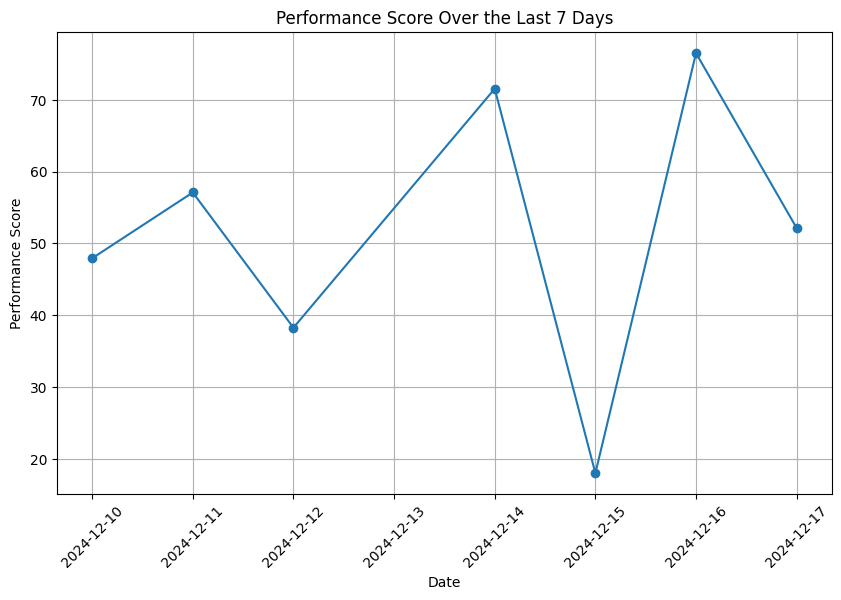

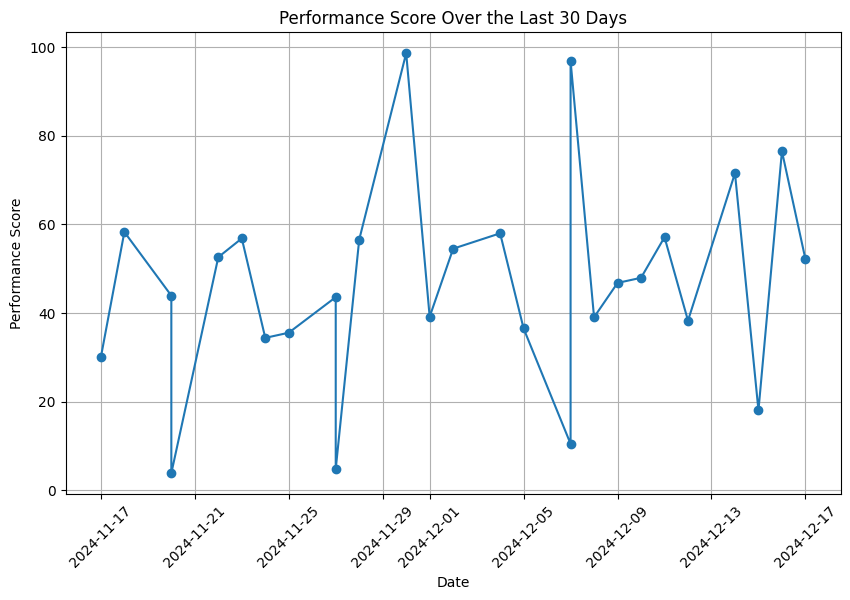

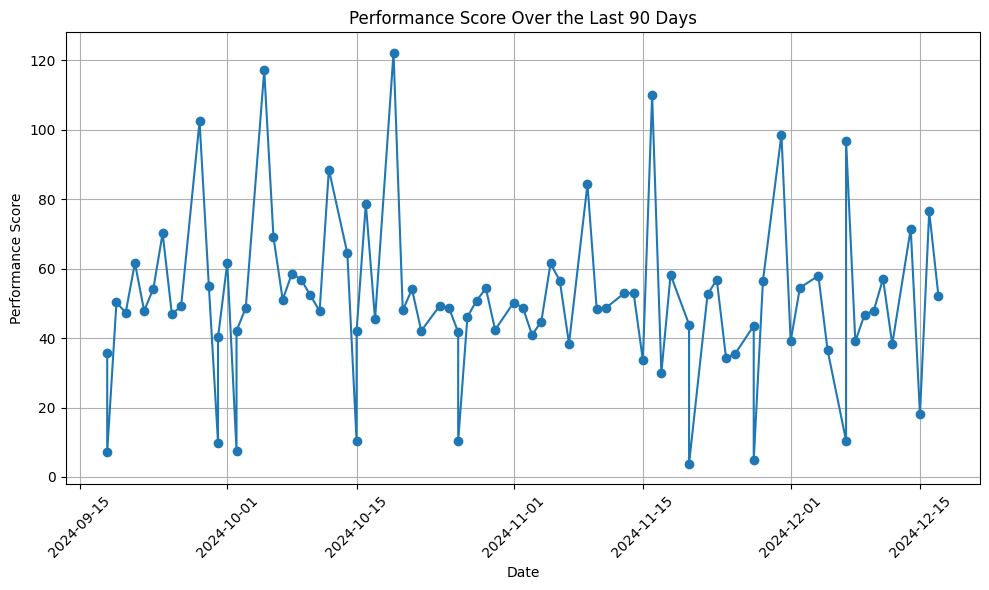

         Date                                     Title  Distance  Pace (mph)  \
52 2024-10-19                                  GINOBILI     20.01    6.824176   
65 2024-10-05                                 Get Lucky     18.01    7.096760   
27 2024-11-16                                     POWER     17.01    7.108893   
73 2024-09-28                                Psychotron     16.01    6.960870   
15 2024-11-30                                   Monster     13.30    7.682927   
9  2024-12-07                                      Peak     13.13    7.675869   
58 2024-10-12                   Give Life Back To Music     13.11    7.233103   
33 2024-11-09                   My Life in the Sunshine     13.11    7.143333   
54 2024-10-16  Err, like hop, I hopped out like wassup?     10.27    7.781941   
1  2024-12-16                                  Detached     10.00    7.879186   

    Heart Rate  Performance Score  
52         162         122.193886  
65         168         117.149035  


In [53]:
df = df[df['Distance'] >= 2.1]

df = df.reset_index(drop=True) 

# Adjusted performance score function to include distance
def calculate_performance_score(pace, heart_rate, distance):
    if pace == 0 or heart_rate == 0:
        return None  # Handle division by zero

   # Updated coefficients and exponents to emphasize pace
    performance_score = (
        (pace ** 1.9)         # Heavily reward faster paces
        * ((distance ** 1) / 1.3)   # Strongly reward longer distances
        / (heart_rate ** 0.31) # Minimally penalize higher heart rate
    )
    return performance_score

# Apply the performance score function to the past 7 days
last_7_days['Performance Score'] = last_7_days.apply(
    lambda row: calculate_performance_score(row['Pace (mph)'], row['Heart Rate'], row['Distance']), axis=1)

# Plot the performance score for the past 7 days
plt.figure(figsize=(10, 6))
plt.plot(last_7_days['Date'], last_7_days['Performance Score'], marker='o')
plt.title('Performance Score Over the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Apply the performance score function to the past 7 days
last_30_days['Performance Score'] = last_30_days.apply(
    lambda row: calculate_performance_score(row['Pace (mph)'], row['Heart Rate'], row['Distance']), axis=1)

# Plot the performance score for the past 7 days
plt.figure(figsize=(10, 6))
plt.plot(last_30_days['Date'], last_30_days['Performance Score'], marker='o')
plt.title('Performance Score Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 


# Apply the performance score function to the past 7 days
last_90_days['Performance Score'] = last_90_days.apply(
    lambda row: calculate_performance_score(row['Pace (mph)'], row['Heart Rate'], row['Distance']), axis=1)

plt.figure(figsize=(10, 6))
plt.plot(last_90_days['Date'], last_90_days['Performance Score'], marker='o')
plt.title('Performance Score Over the Last 90 Days')
plt.xlabel('Date')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sort the last 90 days DataFrame by 'Performance Score' in descending order
top_10_performances = last_90_days.sort_values(by='Performance Score', ascending=False).head(10)

# Display the top 10 performances
print(top_10_performances[['Date', 'Title', 'Distance', 'Pace (mph)', 'Heart Rate', 'Performance Score']])


# pace_below_5_mph = last_7_days

# # Print these entries
# print("Entries with a pace below 5 mph over the last 90 days:")
# print(pace_below_5_mph)


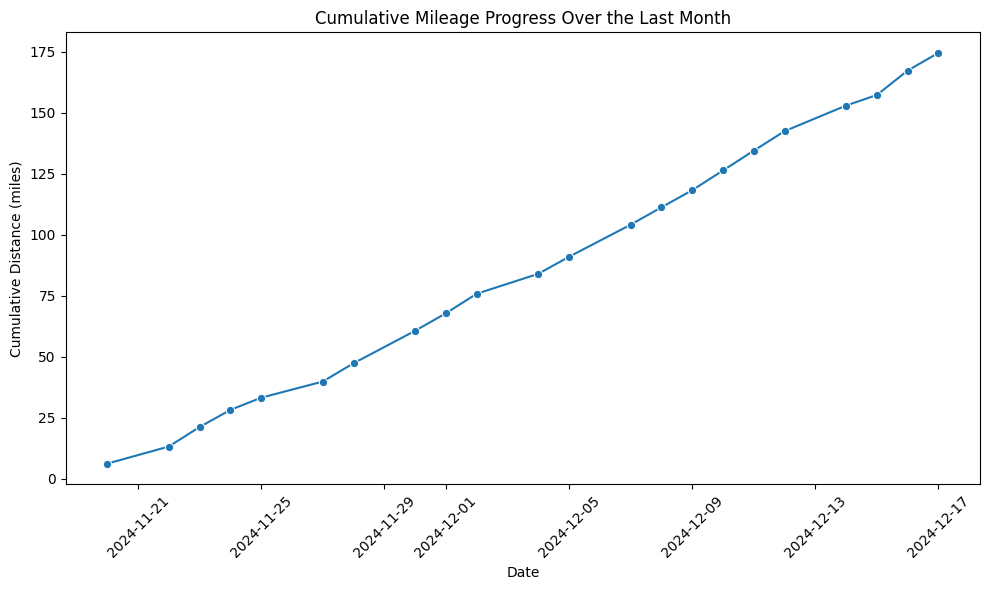

         Date  Distance  Cumulative Mileage
0  2024-11-20      6.23                6.23
1  2024-11-22      7.00               13.23
2  2024-11-23      8.00               21.23
3  2024-11-24      7.00               28.23
4  2024-11-25      5.01               33.24
5  2024-11-27      6.60               39.84
6  2024-11-28      7.50               47.34
7  2024-11-30     13.30               60.64
8  2024-12-01      7.18               67.82
9  2024-12-02      8.00               75.82
10 2024-12-04      8.15               83.97
11 2024-12-05      7.00               90.97
12 2024-12-07     13.13              104.10
13 2024-12-08      7.12              111.22
14 2024-12-09      7.00              118.22
15 2024-12-10      8.10              126.32
16 2024-12-11      8.10              134.42
17 2024-12-12      8.00              142.42
18 2024-12-14     10.50              152.92
19 2024-12-15      4.34              157.26
20 2024-12-16     10.00              167.26
21 2024-12-17      7.25         

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and 'Date' is in datetime format, and 'Distance' is in numeric format

# Ensure 'Distance' is in numeric format
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Drop rows with missing 'Distance' or 'Date' values
df = df.dropna(subset=['Distance', 'Date'])

# Filter data for the past 3 months
three_months_ago = pd.to_datetime('today') - pd.DateOffset(months=1)
df_last_3_months = df[df['Date'] >= three_months_ago]

# Group by date and sum the distance for each day
daily_mileage = df_last_3_months.groupby('Date')['Distance'].sum().reset_index()

# Sort by date
daily_mileage = daily_mileage.sort_values('Date')

# Create a cumulative sum of the mileage
daily_mileage['Cumulative Mileage'] = daily_mileage['Distance'].cumsum()

# Plotting the cumulative mileage over the last 3 months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Cumulative Mileage', data=daily_mileage, marker='o')
plt.title('Cumulative Mileage Progress Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the daily mileage data for review
print(daily_mileage)

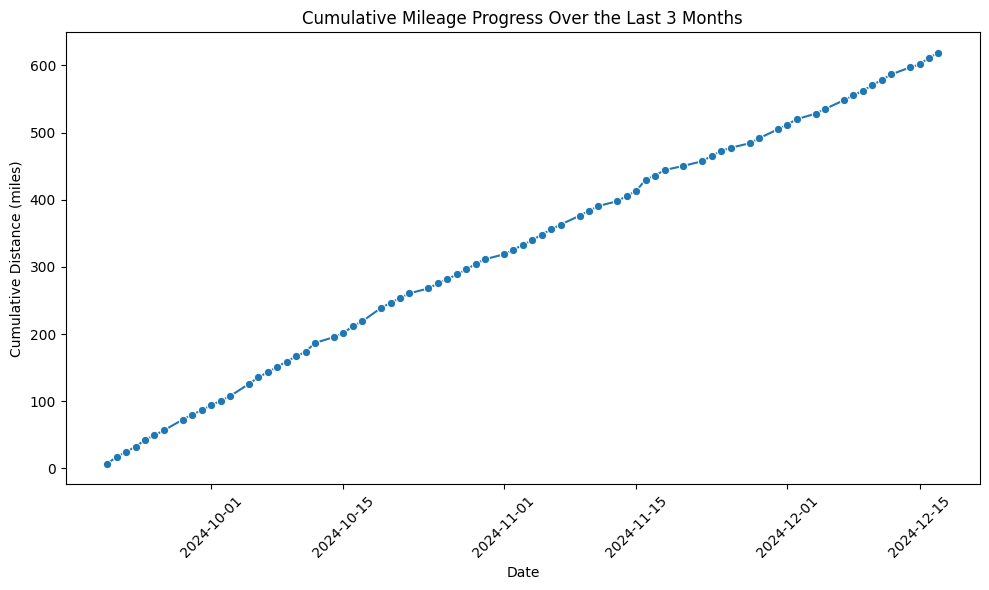

         Date  Distance  Cumulative Mileage
0  2024-09-20      7.10                7.10
1  2024-09-21     10.01               17.11
2  2024-09-22      7.28               24.39
3  2024-09-23      8.00               32.39
4  2024-09-24     10.02               42.41
..        ...       ...                 ...
69 2024-12-12      8.00              586.56
70 2024-12-14     10.50              597.06
71 2024-12-15      4.34              601.40
72 2024-12-16     10.00              611.40
73 2024-12-17      7.25              618.65

[74 rows x 3 columns]


In [ ]:
# Assuming df is already loaded and 'Date' is in datetime format, and 'Distance' is in numeric format

# Ensure 'Distance' is in numeric format
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')

# Drop rows with missing 'Distance' or 'Date' values
df = df.dropna(subset=['Distance', 'Date'])

# Filter data for the past 3 months
three_months_ago = pd.to_datetime('today') - pd.DateOffset(months=3)
df_last_3_months = df[df['Date'] >= three_months_ago]

# Group by date and sum the distance for each day
daily_mileage = df_last_3_months.groupby('Date')['Distance'].sum().reset_index()

# Sort by date
daily_mileage = daily_mileage.sort_values('Date')

# Create a cumulative sum of the mileage
daily_mileage['Cumulative Mileage'] = daily_mileage['Distance'].cumsum()

# Plotting the cumulative mileage over the last 3 months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Cumulative Mileage', data=daily_mileage, marker='o')
plt.title('Cumulative Mileage Progress Over the Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the daily mileage data for review
print(daily_mileage)

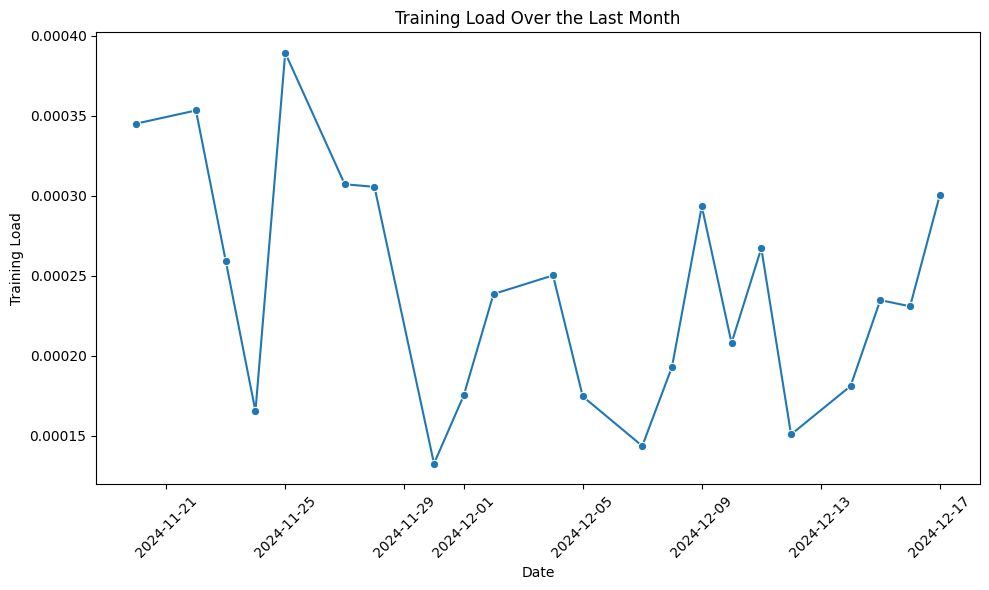

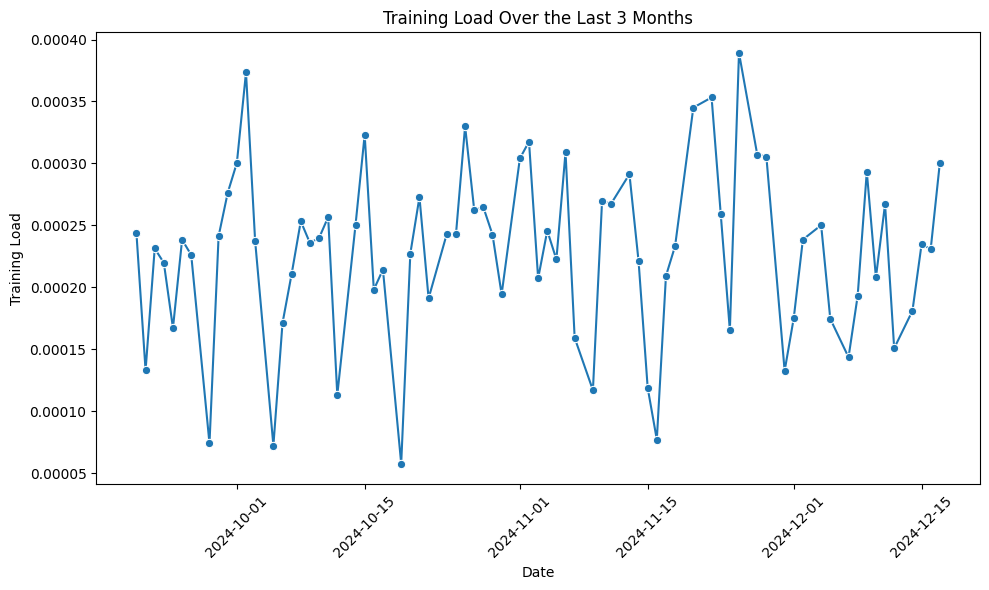

Daily Training Load for the Last Month:
         Date  Training Load
0  2024-11-20       0.000345
1  2024-11-22       0.000353
2  2024-11-23       0.000259
3  2024-11-24       0.000165
4  2024-11-25       0.000389
5  2024-11-27       0.000307
6  2024-11-28       0.000305
7  2024-11-30       0.000133
8  2024-12-01       0.000175
9  2024-12-02       0.000239
10 2024-12-04       0.000250
11 2024-12-05       0.000175
12 2024-12-07       0.000144
13 2024-12-08       0.000193
14 2024-12-09       0.000293
15 2024-12-10       0.000208
16 2024-12-11       0.000267
17 2024-12-12       0.000151
18 2024-12-14       0.000181
19 2024-12-15       0.000235
20 2024-12-16       0.000231
21 2024-12-17       0.000300
Daily Training Load for the Last 3 Months:
         Date  Training Load
0  2024-09-20       0.000243
1  2024-09-21       0.000133
2  2024-09-22       0.000231
3  2024-09-23       0.000220
4  2024-09-24       0.000167
..        ...            ...
69 2024-12-12       0.000151
70 2024-12-14     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to calculate training load
def calculate_training_load(distance, total_seconds, heart_rate, elevation=0):
    """
    Calculate training load for a workout.

    Parameters:
        distance (float): Distance of the run in miles.
        total_seconds (float): Total time of the run in seconds.
        heart_rate (float): Average heart rate during the run.
        elevation (float): Total elevation in feet (optional).

    Returns:
        float: Training load score.
    """
    if total_seconds <= 0 or distance <= 0:
        return None  # Invalid inputs

    # Base load from total time (in minutes) and heart rate (normalized)
    base_load = (total_seconds / 60) * (heart_rate / 100)

    # Pace factor (heavily rewards faster paces)
    pace_factor = (1 / (total_seconds / 60)) ** 3.5  # Heavily reward faster paces (faster = lower time)

    # Distance factor (strongly rewards longer distances)
    distance_factor = (distance ** 1) / 2  # Reward longer distances

    # Elevation adjustment (minimally rewards elevation)
    elevation_factor = 1 + (elevation / 1000)  # Slightly reward elevation

    # Total training load (combining the factors)
    training_load = base_load * pace_factor * distance_factor * elevation_factor
    return training_load

# Assuming 'df' contains the necessary columns ('Date', 'Distance', 'Total Seconds', 'Heart Rate', 'Elevation')

# Apply the training load formula to each run in the DataFrame and assign to the new column 'Training Load'
df['Training Load'] = df.apply(
    lambda row: calculate_training_load(row['Distance'], row['Total Seconds'], row['Heart Rate'], row['Elevation']),
    axis=1
)

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the last month and last 3 months
last_month = pd.to_datetime('today') - pd.DateOffset(months=1)
last_3_months = pd.to_datetime('today') - pd.DateOffset(months=3)

df_last_month = df[df['Date'] >= last_month]
df_last_3_months = df[df['Date'] >= last_3_months]

# Group by date and sum the training load for each day
daily_training_load_last_month = df_last_month.groupby('Date')['Training Load'].sum().reset_index()
daily_training_load_last_3_months = df_last_3_months.groupby('Date')['Training Load'].sum().reset_index()

# Plotting training load over the last month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Training Load', data=daily_training_load_last_month, marker='o')
plt.title('Training Load Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Training Load')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting training load over the last 3 months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Training Load', data=daily_training_load_last_3_months, marker='o')
plt.title('Training Load Over the Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Training Load')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the daily training load data for review
print("Daily Training Load for the Last Month:")
print(daily_training_load_last_month)

print("Daily Training Load for the Last 3 Months:")
print(daily_training_load_last_3_months)

In [ ]:
# Filter data for the last month and last 3 months
last_month = pd.to_datetime('today') - pd.DateOffset(months=1)
last_3_months = pd.to_datetime('today') - pd.DateOffset(months=3)

df_last_month = df[df['Date'] >= last_month]
df_last_3_months = df[df['Date'] >= last_3_months]

# Apply training load calculation to both DataFrames
df_last_month['Training Load'] = df_last_month.apply(calculate_training_load, axis=1)
df_last_3_months['Training Load'] = df_last_3_months.apply(calculate_training_load, axis=1)

# Group by date and sum the training load for each day
daily_training_load_last_month = df_last_month.groupby('Date')['Training Load'].sum().reset_index()
daily_training_load_last_3_months = df_last_3_months.groupby('Date')['Training Load'].sum().reset_index()

# Plotting training load over the last month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Training Load', data=daily_training_load_last_month, marker='o')
plt.title('Training Load Over the Last Month')
plt.xlabel('Date')
plt.ylabel('Training Load')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting training load over the last 3 months
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Training Load', data=daily_training_load_last_3_months, marker='o')
plt.title('Training Load Over the Last 3 Months')
plt.xlabel('Date')
plt.ylabel('Training Load')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, print the daily training load data for review
print("Daily Training Load for the Last Month:")
print(daily_training_load_last_month)

print("Daily Training Load for the Last 3 Months:")
print(daily_training_load_last_3_months)

TypeError: calculate_training_load() missing 2 required positional arguments: 'total_seconds' and 'heart_rate'